In [1]:
#for displaying matplotlib figures in line
%matplotlib inline
import matplotlib as mpl
#interface to matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.patches as mpatches 

## Basic Plotting Example

* For all the arguments of the pyplot.plot function look at : https://matplotlib.org/3.2.1/api/pyplot_summary.html

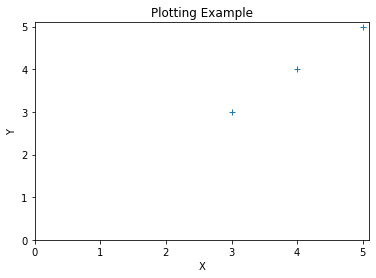

In [2]:
#plt.plot(X_series, Y_series, marker)
plt.plot((5,4,3),(5,4,3),'+')
#labling chart and axes
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Plotting Example')
#correcting xticks and yticks to integers
plt.xticks(np.arange(0, 6, step=1))
plt.yticks(np.arange(0, 6, step=1))
#rendering plot
plt.show()

## Shaping Data for Plots
##### The indexes of the data frame is the x_axis in plots
##### The columns of the data frame are the legends

In [3]:
# Extacting data from open source excel
df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)


In [4]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [5]:
#how to refer to columns and index 
#df_can.columns.tolist()
#df_can.index.tolist()

In [6]:
# in pandas axis=0 represents rows (default) and axis=1 represents columns
# Dropping unecessary columns
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)

#renaming the columns
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
#df_can.columns

#setting country column as index
df_can.set_index('Country', inplace=True)
#removing country as index
#df_can.reset_index()

# horizontal sum for total over the years, over columns hence axis=1
df_can['Total'] = df_can.sum(axis=1)

In [7]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [8]:
# Filtering the dataframe by index lables
# df_can.loc[[index_lables],[column lables]]
df_can.loc[['Japan','India','China'],[1983,1984,1985,1986,1987]]

,1983,1984,1985,1986,1987
Country,,,,,
Japan,309,246,198,248,422
India,7338,5704,4211,7150,10189
China,1863,1527,1816,1960,2643


In [9]:
# FIltering as series
df_can.loc['Japan']

Continent                 Asia
Region            Eastern Asia
DevName      Developed regions
1980                       701
1981                       756
1982                       598
1983                       309
1984                       246
1985                       198
1986                       248
1987                       422
1988                       324
1989                       494
1990                       379
1991                       506
1992                       605
1993                       907
1994                       956
1995                       826
1996                       994
1997                       924
1998                       897
1999                      1083
2000                      1010
2001                      1092
2002                       806
2003                       817
2004                       973
2005                      1067
2006                      1212
2007                      1250
2008                      1284
2009    

In [10]:
#Filtering by location number
df_can.iloc[[87]]

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Japan,Asia,Eastern Asia,Developed regions,701,756,598,309,246,198,248,...,1067,1212,1250,1284,1194,1168,1265,1214,982,27707


In [11]:
# extracting like a matrix
print(df_can.loc['Japan', 2013])
#alternatives
#print(df_can.iloc[87, 36]) 

982


In [12]:
#converting all columns to string
df_can.columns = list(map(str, df_can.columns))
#keeping the years as list for later use
#how to convert intergers to string
years = list(map(str, range(1980, 2014)))


In [13]:
# Filtring based on conditions
#df_can[df_can['Continent'] == 'Asia']
df_can[(df_can['Continent']=='Asia') & (df_can['Region']=='Southern Asia')]

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Bangladesh,Asia,Southern Asia,Developing regions,83,84,86,81,98,92,486,...,4171,4014,2897,2939,2104,4721,2694,2640,3789,65568
Bhutan,Asia,Southern Asia,Developing regions,0,0,0,0,1,0,0,...,5,10,7,36,865,1464,1879,1075,487,5876
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,1794,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
Maldives,Asia,Southern Asia,Developing regions,0,0,0,1,0,0,0,...,0,0,2,1,7,4,3,1,1,30
Nepal,Asia,Southern Asia,Developing regions,1,1,6,1,2,4,13,...,607,540,511,581,561,1392,1129,1185,1308,10222
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
Sri Lanka,Asia,Southern Asia,Developing regions,185,371,290,197,1086,845,1838,...,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358


## Line Plots

In [14]:
# Filtering Haiti and years
haiti = df_can.loc['Haiti', years]
haiti.index = haiti.index.map(int)
haiti.head()

1980    1666
1981    3692
1982    3498
1983    2860
1984    1418
Name: Haiti, dtype: object

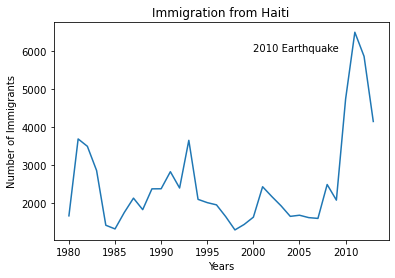

In [15]:
#declaring the plot
haiti.plot(kind='line')
# styling the plot
plt.title('Immigration from Haiti')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

#annotate the 2010 Earthquake. 
#syntax: plt.text(x, y, label)
plt.text(2000, 6000, '2010 Earthquake')

plt.show() 

In [16]:
indochin=df_can.loc[['India','China'], years]
indochin

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129


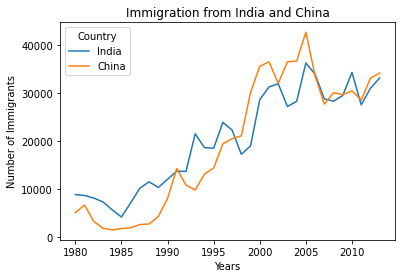

In [17]:
#since columns are legends
indochin=indochin.transpose()
#index always on x-axis
indochin.plot(kind='line')

plt.title('Immigration from India and China')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')
 
# syntax: plt.text(x, y, label)
#plt.text(2000, 6000, '2010 Earthquake') # see note below

plt.show() 

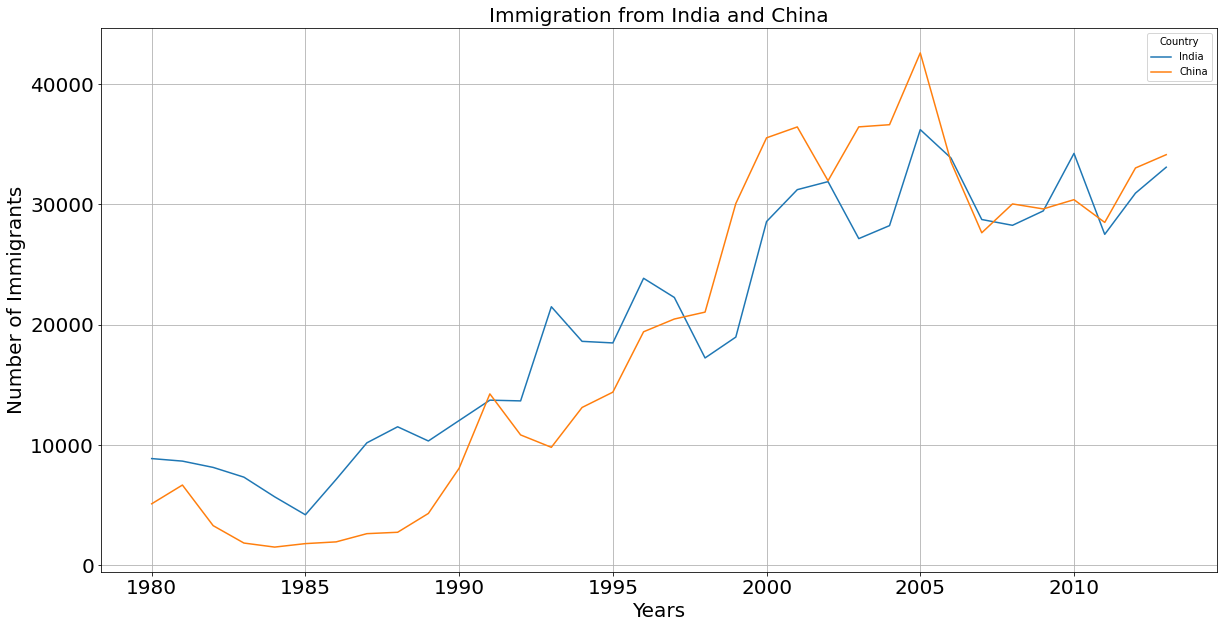

In [18]:
#Enlarging by figsize argument
indochin.plot(kind='line',figsize=(20,10))
#increasing fontsize of the lables
plt.title('Immigration from India and China',fontsize=20)
plt.ylabel('Number of Immigrants',fontsize=20)
plt.xlabel('Years',fontsize=20)
#adding grids
plt.grid(True)
#increasing font size of the tick numbers
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)



plt.show() 

### Kind Parameters (types of graphs)
* `bar` for vertical bar plots
* `barh` for horizontal bar plots
* `hist` for histogram
* `box` for boxplot
* `kde` or `density` for density plots
* `area` for area plots
* `pie` for pie plots
* `scatter` for scatter plots
* `hexbin` for hexbin plot

## Area Graph

In [19]:
# Sorting by one columns value
df_can.sort_values(['Total'], ascending=False, axis=0, inplace=True)


In [20]:
#since indexes are legends
# getting only top 5 countries which imigrate to Canada
df_top5=df_can.head(5)[years].transpose()

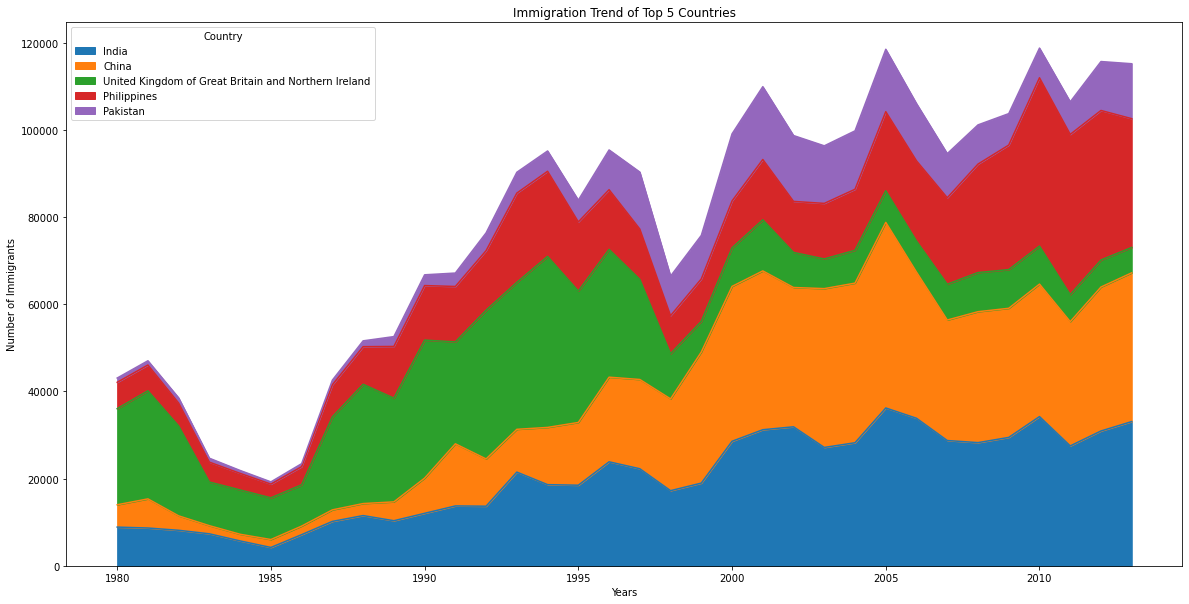

In [21]:
#changing indexes back to string
df_top5.index = df_top5.index.map(int)
df_top5.plot(kind='area',
             figsize=(20, 10), # pass a tuple (x, y) size
             )

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

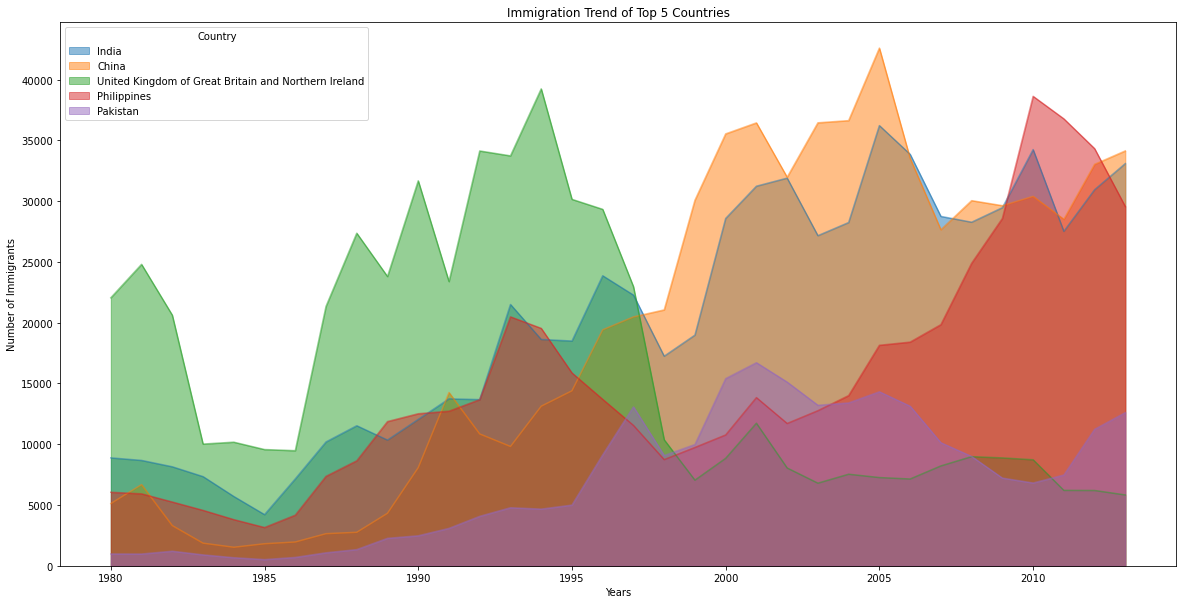

In [22]:
# stacked by default, lets unstack and give soome transparency
df_top5.plot(kind='area',
             figsize=(20, 10),
             stacked=False,
             alpha=0.5
             )

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

## Histograms

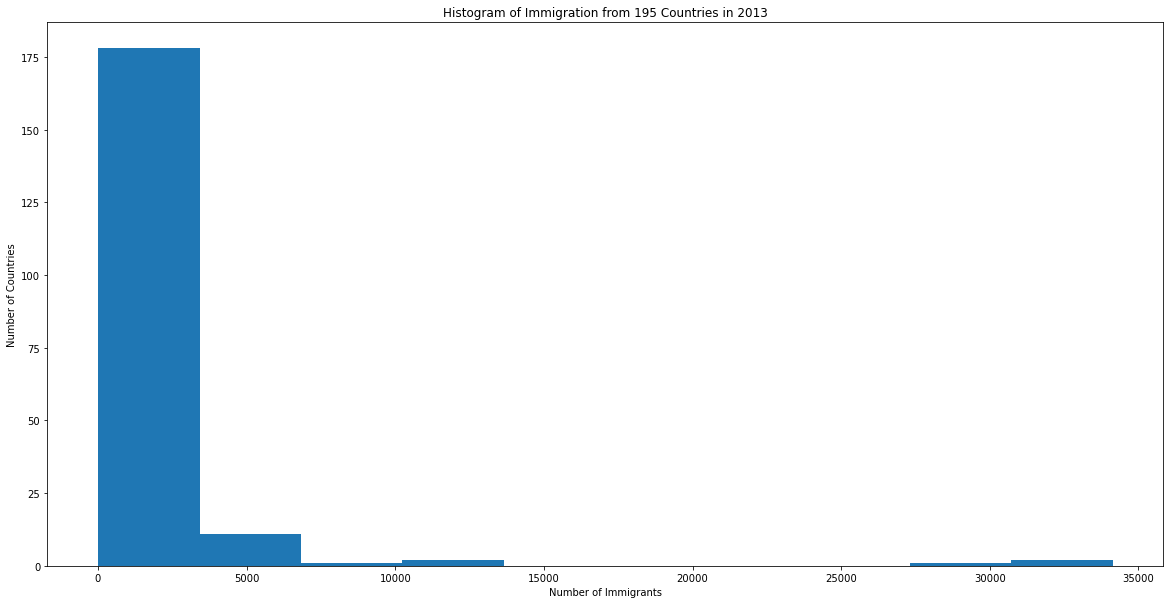

In [23]:
df_can['2013'].plot(kind='hist', figsize=(20, 10))
# the binsize is according to the plot function
plt.title('Histogram of Immigration from 195 Countries in 2013') # add a title to the histogram
plt.ylabel('Number of Countries') # add y-label
plt.xlabel('Number of Immigrants') # add x-label
plt.grid(False)

plt.show()

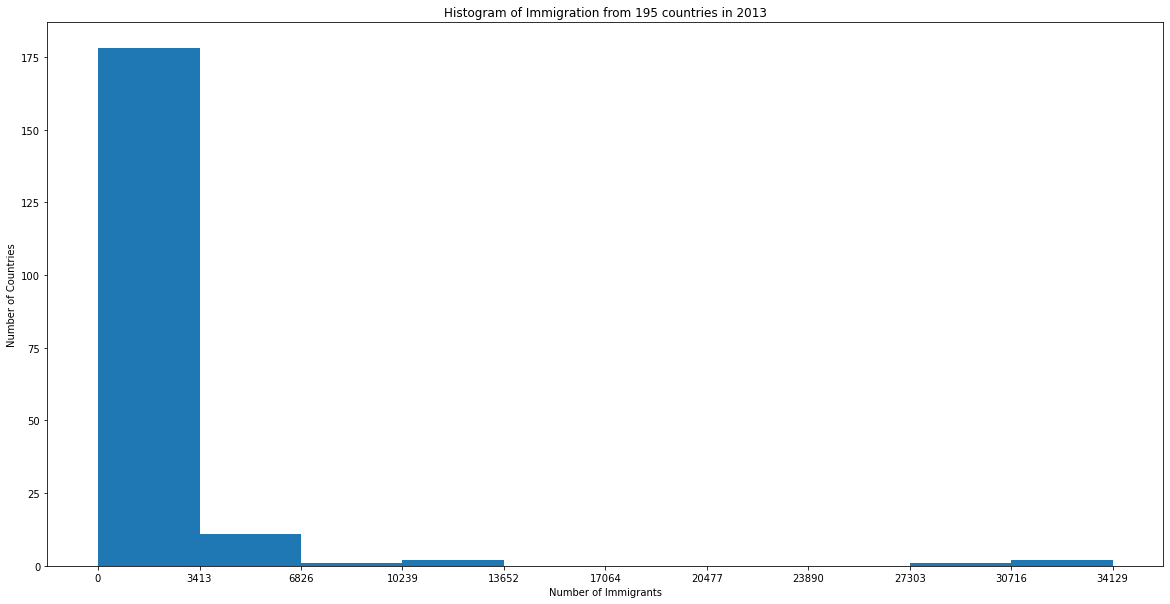

In [24]:
# 'bin_edges' is a list of bin intervals
# finding big edges to relable xticks
count, bin_edges = np.histogram(df_can['2013'])

df_can['2013'].plot(kind='hist', figsize=(20, 10), xticks=bin_edges)

plt.title('Histogram of Immigration from 195 countries in 2013') # add a title to the histogram
plt.ylabel('Number of Countries') # add y-label
plt.xlabel('Number of Immigrants') # add x-label

plt.show()

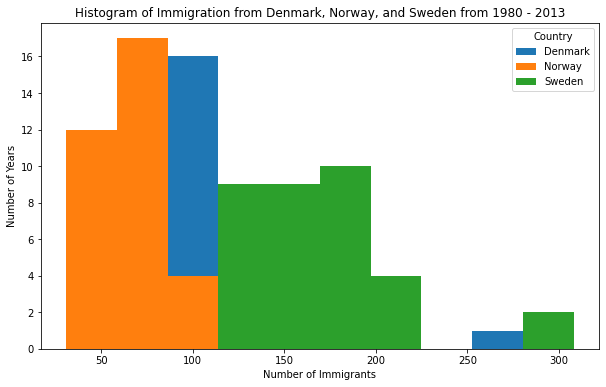

In [25]:
# Histogram for multiple countries
# since columns are legends
df_t = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
df_t.plot(kind='hist', figsize=(10, 6))

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

Let's make a few modifications to improve the impact and aesthetics of the previous plot:
* increase the bin size to 15 by passing in `bins` parameter
* set transparency to 60% by passing in `alpha` paramemter
* label the x-axis by passing in `x-label` paramater
* change the colors of the plots by passing in `color` parameter

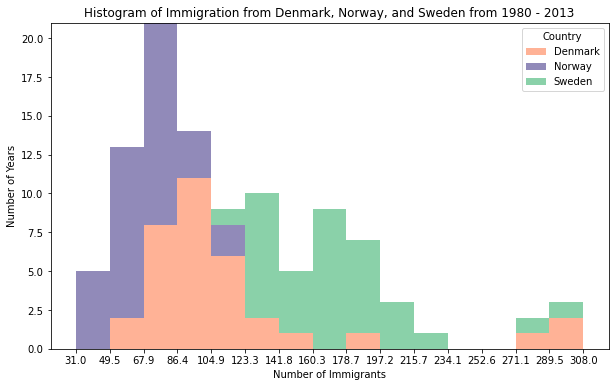

In [26]:
# let's get the x-tick values
count, bin_edges = np.histogram(df_t, 15)

# un-stacked histogram
df_t.plot(kind ='hist', 
          figsize=(10, 6),
          bins=15,
          alpha=0.6,
          xticks=bin_edges,
          stacked=True,
          color=['coral', 'darkslateblue', 'mediumseagreen']
         )

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

## Bar Charts

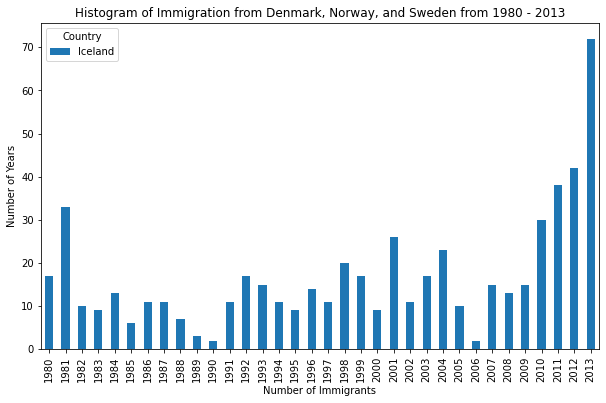

In [27]:
#For one country
df_t = df_can.loc[['Iceland'], years].transpose()
#count, bin_edges = np.histogram(df_t, 15)

# un-stacked histogram
df_t.plot(kind ='bar', 
          figsize=(10, 6),stacked=False)

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')
plt.grid(False)

plt.show()

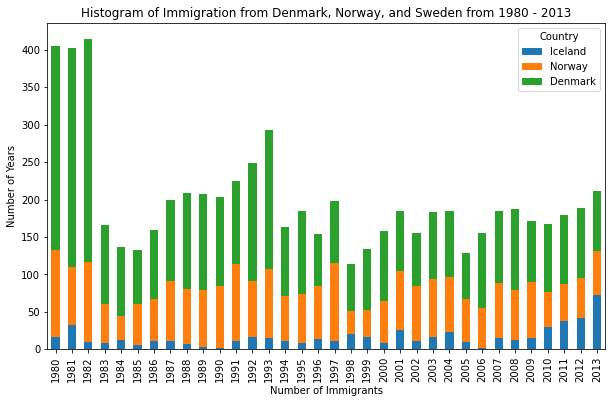

In [28]:
# Stacked bars for mutiple countries, countries are legends, years is the x-axis
df_t = df_can.loc[['Iceland','Norway','Denmark'], years].transpose()
#count, bin_edges = np.histogram(df_t, 15)

# un-stacked histogram
df_t.plot(kind ='bar', 
          figsize=(10, 6),stacked=True)

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')
plt.grid(False)

plt.show()

## Pie Chart

In [29]:
# group countries by continents and apply sum() function 
df_continents = df_can.groupby('Continent', axis=0).sum()

# note: the output of the groupby method is a `groupby' object. 
# we can not use it further until we apply a function (eg .sum())
print(type(df_can.groupby('Continent', axis=0)))

df_continents.head()

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142


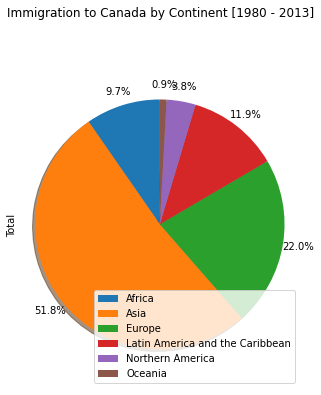

In [30]:
# autopct create %, start angle represent starting point
df_continents['Total'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,
                            labels=None,
                            pctdistance=1.12,# add shadow      
                            )

plt.title('Immigration to Canada by Continent [1980 - 2013]',y=1.12)
plt.axis('equal') # Sets the pie chart to look like a circle.
plt.legend(labels=df_continents.index, loc='lower right')
plt.show()

## Box Plots

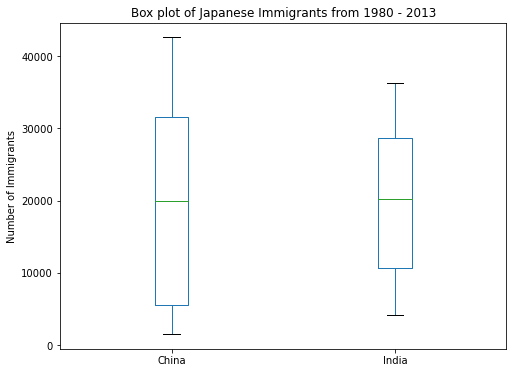

In [31]:
#since columns are the box
df_CI = df_can.loc[['China','India'], years].transpose()
df_CI.plot(kind='box', figsize=(8, 6))

plt.title('Box plot of Japanese Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')

plt.show()

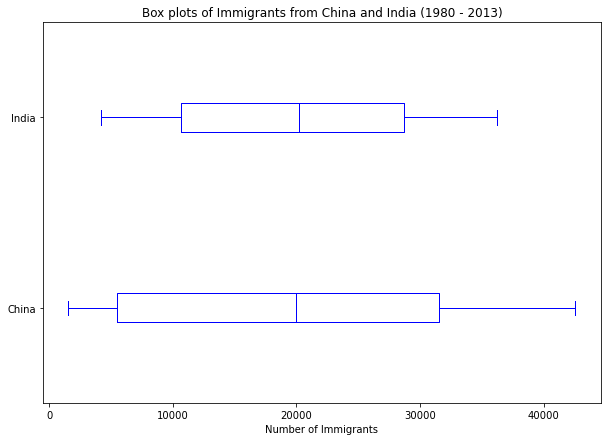

In [32]:
df_CI.plot(kind='box', figsize=(10, 7), color='blue', vert=False)

plt.title('Box plots of Immigrants from China and India (1980 - 2013)')
plt.xlabel('Number of Immigrants')

plt.show()

## Subplots

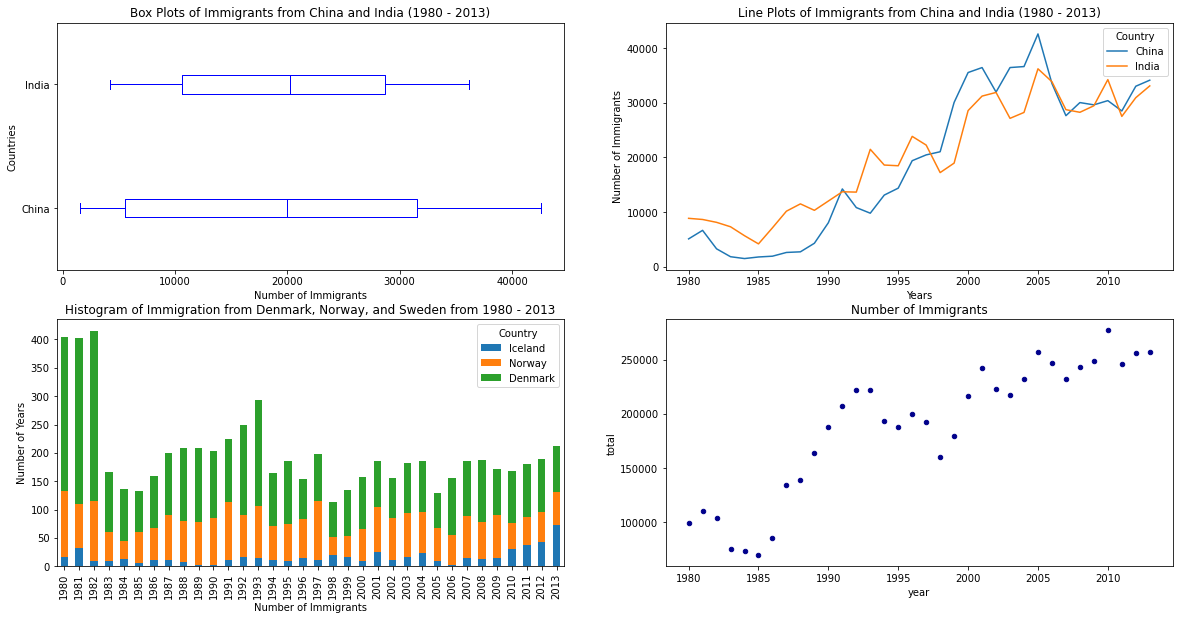

In [33]:
fig = plt.figure() # create figure

ax0 = fig.add_subplot(2, 2, 1) # add subplot 1 (1 row, 1 columns, first plot).
ax1 = fig.add_subplot(2, 2, 2) # add subplot 2 (1 row, 2 columns, second plot).
ax2 = fig.add_subplot(2, 2, 3) # add subplot 3 (2 row, 1 columns, third plot). 
ax3 = fig.add_subplot(2, 2, 4) # add subplot 4 (2 row, 2 columns, fourth plot). 

# Subplot 1: Box plot
df_CI = df_can.loc[['China','India'], years].transpose()
df_CI.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0) # add to subplot 1
ax0.set_title('Box Plots of Immigrants from China and India (1980 - 2013)')
ax0.set_xlabel('Number of Immigrants')
ax0.set_ylabel('Countries')

# Subplot 2: Line plot
df_CI.plot(kind='line', figsize=(20, 6), ax=ax1) # add to subplot 2
ax1.set_title ('Line Plots of Immigrants from China and India (1980 - 2013)')
ax1.set_ylabel('Number of Immigrants')
ax1.set_xlabel('Years')

# Subplot 3:Stacked Bar plot
df_t = df_can.loc[['Iceland','Norway','Denmark'], years].transpose() # add to subplot 3
df_t.plot(kind ='bar', figsize=(10, 6),stacked=True,ax=ax2)
ax2.set_title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
ax2.set_ylabel('Number of Years')
ax2.set_xlabel('Number of Immigrants')
#plt.grid(False)

# Subplot 4:Scatter plot
df_tot = df_can[years].sum(axis=0).to_frame().reset_index()
df_tot.columns=['year','total']
df_tot['year'] = list(map(int, df_tot['year']))
df_tot.plot(kind='scatter', x='year', y='total', figsize=(20,10), color='darkblue',ax=ax3)
ax3.set_title('Total Immigration to Canada from 1980 - 2013')
ax3.set_title('Year')
ax3.set_title('Number of Immigrants')
#plt.grid(False)




plt.show()

## Scatter Plot

In [34]:
# changing index to columns as scatter plot requires a X and Y
df_tot = df_can[years].sum(axis=0).to_frame().reset_index()
df_tot.columns=['year','total']
df_tot['year'] = list(map(int, df_tot['year']))

df_tot.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


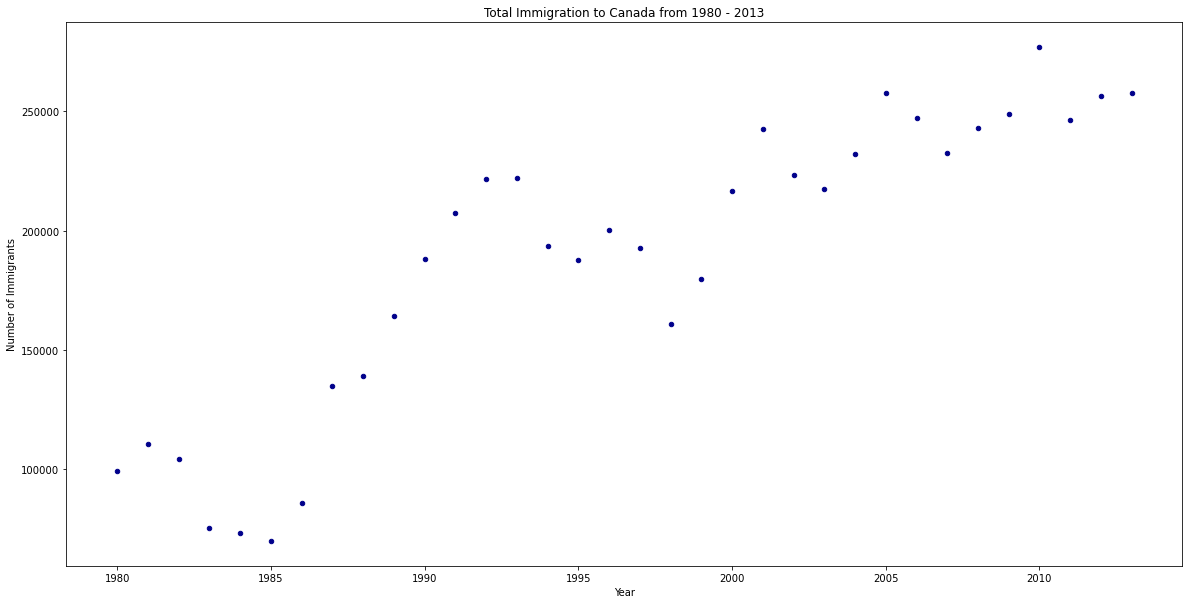

In [35]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(20,10), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.grid(False)

plt.show()

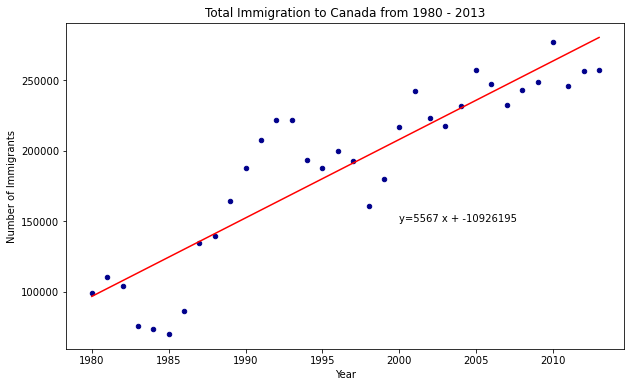

'No. Immigrants = 5567 * Year + -10926195'

In [36]:
# Fitting a regression line
x = df_tot['year']      # year on x-axis
y = df_tot['total']     # total on y-axis
# gives X and Y values
fit = np.polyfit(x, y, deg=1)
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

# plot line of best fit
plt.plot(x, fit[0] * x + fit[1], color='red') # recall that x is the Years
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))

plt.show()

# print out the line of best fit
'No. Immigrants = {0:.0f} * Year + {1:.0f}'.format(fit[0], fit[1]) 

In [37]:
df_can_t = df_can[years].transpose() # transposed dataframe

# cast the Years (the index) to type int
df_can_t.index = map(int, df_can_t.index)

# let's label the index. This will automatically be the column name when we reset the index
df_can_t.index.name = 'Year'

# reset index to bring the Year in as a column
df_can_t.reset_index(inplace=True)

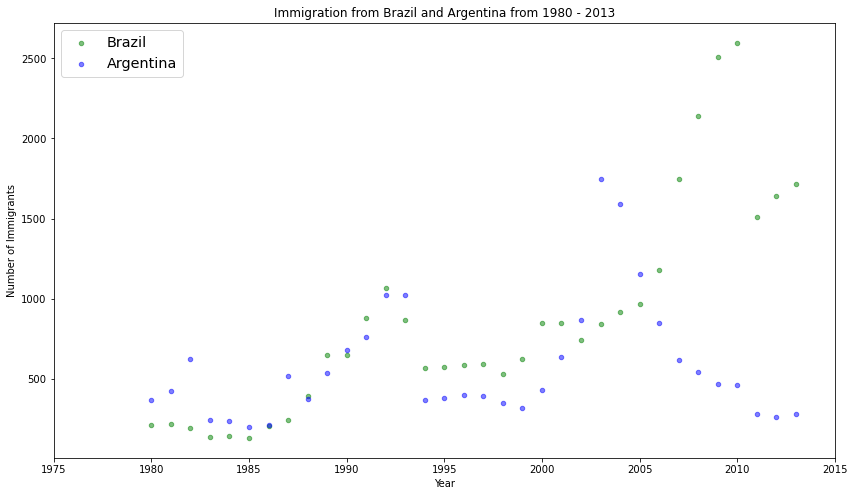

In [38]:
# Example of two scatters in same graph
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Brazil',
                    figsize=(14, 8),
                    alpha=0.5,                  # transparency
                    color='green',
                      # pass in weights 
                    xlim=(1975, 2015)
                   )

# Argentina
ax1 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Argentina',
                    alpha=0.5,
                    color="blue",
                    ax = ax0
                   )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Brazil and Argentina from 1980 - 2013')
ax0.legend(['Brazil', 'Argentina'], loc='upper left', fontsize='x-large')

## Bubble Plot

*  A special case of scatter plots by introducing 's' parameter

In [39]:
# normalize Brazil data
norm_brazil = (df_can_t['Brazil'] - df_can_t['Brazil'].min()) / (df_can_t['Brazil'].max() - df_can_t['Brazil'].min())

# normalize Argentina data
norm_argentina = (df_can_t['Argentina'] - df_can_t['Argentina'].min()) / (df_can_t['Argentina'].max() - df_can_t['Argentina'].min())

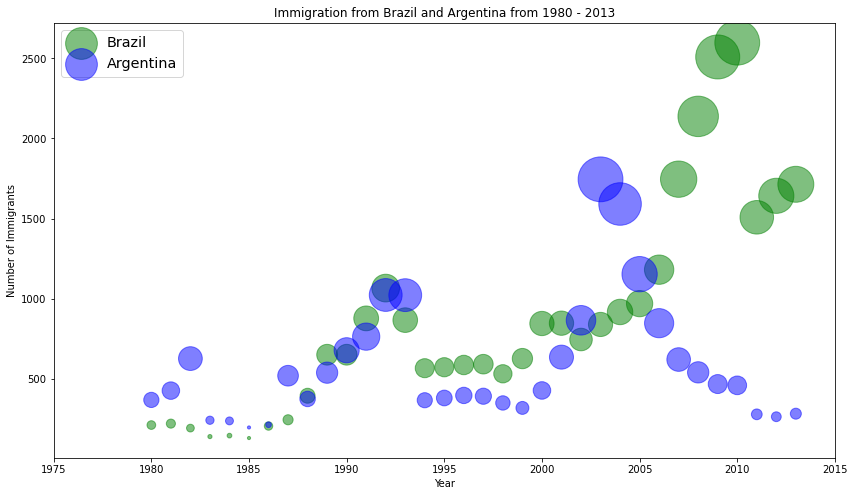

In [40]:
# Brazil
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Brazil',
                    figsize=(14, 8),
                    alpha=0.5,                  # transparency
                    color='green',
                    s=norm_brazil*2000+10,  # pass in weights for bubble size 
                    xlim=(1975, 2015)
                   )

# Argentina
ax1 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Argentina',
                    alpha=0.5,
                    color="blue",
                    s=norm_argentina*2000+10,  # pass in weights for bubble size 
                    ax = ax0 # how to plot different scatters in same plot
                   )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Brazil and Argentina from 1980 - 2013')
ax0.legend(['Brazil', 'Argentina'], loc='upper left', fontsize='x-large')

## Regression Plots

In [41]:
# import library
import seaborn as sns

In [42]:
# we can use the sum() method to get the total population per year
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

# change the years to type float (useful for regression later on)
df_tot.index = map(int, df_tot.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace=True)

# rename columns
df_tot.columns = ['year', 'total']

# view the final dataframe
df_tot.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


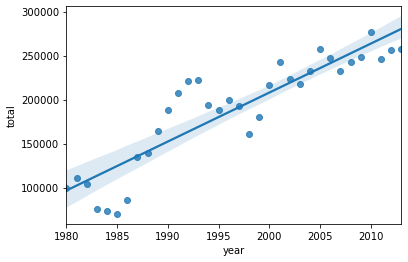

In [43]:
import seaborn as sns
ax = sns.regplot(x='year', y='total', data=df_tot)

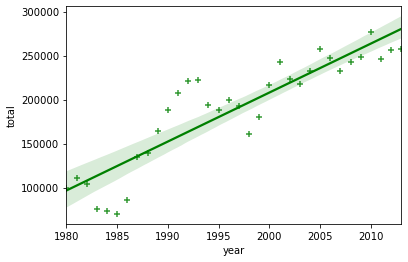

In [44]:
#changing color and marker
import seaborn as sns
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+')

* Increased Figure Size
* Increased lable font size
* Increased ticks fontsize
* Changed Background theme

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

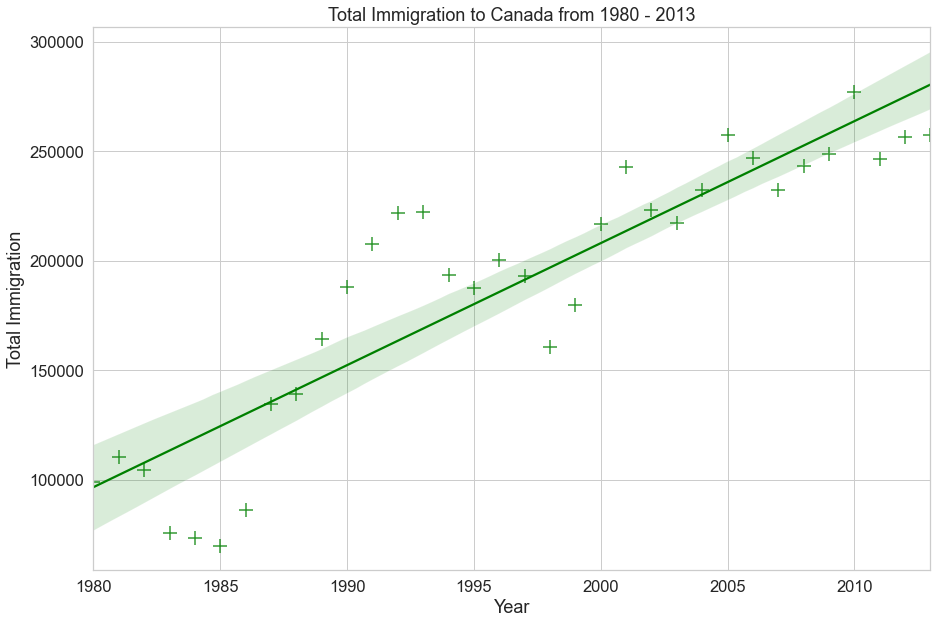

In [45]:

plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('whitegrid') # change background to white background

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')

## Subplots

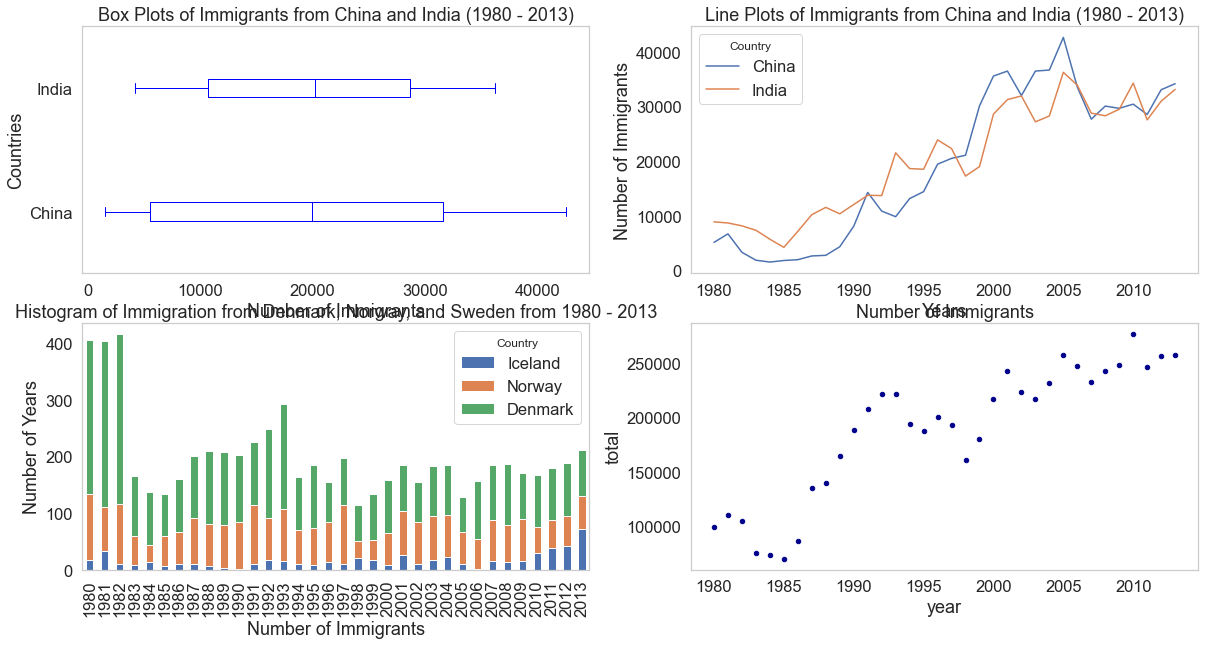

In [46]:
fig = plt.figure() # create figure

ax0 = fig.add_subplot(2, 2, 1) # add subplot 1 (1 row, 1 columns, first plot).
ax1 = fig.add_subplot(2, 2, 2) # add subplot 2 (1 row, 2 columns, second plot).
ax2 = fig.add_subplot(2, 2, 3) # add subplot 3 (2 row, 1 columns, third plot). 
ax3 = fig.add_subplot(2, 2, 4) # add subplot 4 (2 row, 2 columns, fourth plot). 

# Subplot 1: Box plot
df_CI = df_can.loc[['China','India'], years].transpose()
df_CI.plot(kind='box', color='blue', vert=False, figsize=(20, 10), ax=ax0) # add to subplot 1
ax0.set_title('Box Plots of Immigrants from China and India (1980 - 2013)')
ax0.set_xlabel('Number of Immigrants')
ax0.set_ylabel('Countries')
ax0.grid(False)


# Subplot 2: Line plot
df_CI.plot(kind='line', figsize=(20, 10), ax=ax1) # add to subplot 2
ax1.set_title ('Line Plots of Immigrants from China and India (1980 - 2013)')
ax1.set_ylabel('Number of Immigrants')
ax1.set_xlabel('Years')
ax1.grid(False)


# Subplot 3:Stacked Bar plot
df_t = df_can.loc[['Iceland','Norway','Denmark'], years].transpose() # add to subplot 3
df_t.plot(kind ='bar', figsize=(20, 10),stacked=True,ax=ax2)
ax2.set_title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
ax2.set_ylabel('Number of Years')
ax2.set_xlabel('Number of Immigrants')
ax2.grid(False)

# Subplot 4:Scatter plot
df_tot = df_can[years].sum(axis=0).to_frame().reset_index()
df_tot.columns=['year','total']
df_tot['year'] = list(map(int, df_tot['year']))
df_tot.plot(kind='scatter', x='year', y='total', figsize=(20,10), color='darkblue',ax=ax3)
ax3.set_title('Total Immigration to Canada from 1980 - 2013')
ax3.set_title('Year')
ax3.set_title('Number of Immigrants')
ax3.grid(False)




plt.show()